# Test 19: Discriminant test for the origin of a p-fold sample

## Objective

- This is very similar to `Test 18`
    - In `Test 18`, we had 2 groups of values and some $n$ observations of $k$ features in each group
    - We wanted to know, are the 2 groups sufficiently different such that we can reject the null that they are the same

- In this case, we have a set of observations that we know are from group 1, and another that we know are from group 2.

- Given a 3rd set of observations from an unknown distribution, is this more likely to have come from group 1 or 2?

## Assumptions

- This uses Hotelling's $T^2$ statistic, so the same assumptions apply:

- All the variables (values in the series) are assumed to be independent of each other
- All variables follow a multivariate normal distribution
    - It is ok if the variables are correlated

## Method

- From population 1, we have $n_1$ observations and $k=3$ features. Let's call this $x$

- From population 2, we have $n_2$ observations and $k=3$ features. Let's call this $y$

- We have an unknown set of $n_3$ observations and $k=3$  features, which we'll call $z$

- Compute the column means of each of the matrix $x$, $y$, $z$, giving you $\bar{x}, \bar{y}, \bar{z}$
    - Each of these is a $k \times 1$ array 

- Let $x_{ij}$ represent the covariance of the $i$-th column and $j$-th column in matrix $x$

- We now want to solve for the unknown coefficients in the same manner as Hotelling's $T^2$:

- Find $k=3$ coefficients $\alpha_{1}, \alpha_{2}, \alpha_{3}$ such that:
$$\begin{aligned}
    \alpha_1 \cdot [x_{00} + y_{00}] + \alpha_2 \cdot [x_{01} + y_{01}] + \alpha_3 \cdot [x_{02} + y_{02}] &= (n_1 + n_2 - 2) \cdot (\bar{x_0} - \bar{y_0}) \\

    \alpha_1 \cdot [x_{10} + y_{10}] + \alpha_2 \cdot [x_{11} + y_{11}] + \alpha_3 \cdot [x_{12} + y_{12}] &= (n_1 + n_2 - 2) \cdot (\bar{x_1} - \bar{y_1}) \\

    \alpha_1 \cdot [x_{20} + y_{20}] + \alpha_2 \cdot [x_{21} + y_{21}] + \alpha_3 \cdot [x_{22} + y_{22}] &= (n_1 + n_2 - 2) \cdot (\bar{x_2} - \bar{y_2}) \\
\end{aligned}$$

- Define matrices
$$\begin{aligned}
    B &= \begin{bmatrix}
        x_{00} + y_{00} & x_{01} + y_{01} & x_{02} + y_{02} \\
        x_{10} + y_{10} & x_{11} + y_{11} & x_{12} + y_{12} \\
        x_{20} + y_{20} & x_{21} + y_{21} & x_{22} + y_{22} \\
    \end{bmatrix} \\ \\

    \alpha &= \begin{bmatrix}
        \alpha_0 \\
        \alpha_1 \\
        \alpha_2
    \end{bmatrix} \\ \\ 

    N &= \begin{bmatrix}
        (n_1 + n_2 - 2) \cdot (\bar{x_0} - \bar{y_0}) \\
        (n_1 + n_2 - 2) \cdot (\bar{x_1} - \bar{y_1}) \\
        (n_1 + n_2 - 2) \cdot (\bar{x_2} - \bar{y_2}) 
        \end{bmatrix}
\end{aligned}$$

- Then we want to solve for matrix $\alpha = \begin{bmatrix} \alpha_0 \\ \alpha_1 \\ \alpha_2 \end{bmatrix}$
$$\begin{aligned}
    B \cdot \alpha &= N \\
    \alpha &= B^{-1} \cdot N
\end{aligned}$$

- Finally, we can compute the the statistics $D_x$ and $D_y$ and $D_z$ using the values of $\alpha$ we just found. Note that $\bar{x_i}$ just refers to the mean of the i-th column in matrix $x$
$$\begin{aligned}
    D_x &= \alpha_0 \bar{x_0} + \alpha_1 \bar{x_1} + \alpha_2 \bar{x_2} \\
    D_y &= \alpha_0 \bar{y_0} + \alpha_1 \bar{y_1} + \alpha_2 \bar{y_2} \\
    D_z &= \alpha_0 \bar{z_0} + \alpha_1 \bar{z_1} + \alpha_2 \bar{z_2} \\
\end{aligned}$$

- Remember, the point is to decide if the sample $z$ was more likely to come from $x$ or $y$
    - So if $D_x - D_z < D_y - D_z$, we say that the series came from the same population as $x$ (i.e. if the distance from $x$ to $z$ is shorter than the distance from $y$ to $z$)

- Distances are not guaranteed to follow any distribution, so there isn't really a "hypothesis test" framework here

## Simulated Example

In [5]:
import numpy as np
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_spd_matrix

In [ ]:
def compute_covariance(matrix, index1, index2):
    cov = np.sum(
        (matrix[:,index1] - np.mean(matrix[:,index1])) *
        (matrix[:,index2] - np.mean(matrix[:,index2])) 
    )
    return cov

def make_variance_covariance_matrix(matrix, n_features):
    B = np.array([
        compute_covariance(matrix, i, j)  
        for i in range(n_features)
        for j in range(n_features)
    ]).reshape(n_features, n_features)

    for i in range(n_features):
        for j in range(n_features):
            assert B[i][j] == B[j][i]

    return B

In [32]:
N_FEATURES = 3
MEANS = np.random.uniform(-10,10,N_FEATURES)
COV = make_spd_matrix(N_FEATURES)

MEANS_2 = np.random.uniform(-3,3,N_FEATURES)
COV_2 = make_spd_matrix(N_FEATURES)**2

SAMPLE_SIZE_1 = 100
SAMPLE_SIZE_2 = 123
SAMPLE_SIZE_3 = 231

def get_distance_sample():
    ## In this case, z is clearly closer to x than to y.
    ## Lets see if our method of classifying it will give us that conclusion
    x = np.random.multivariate_normal(MEANS, COV, SAMPLE_SIZE_1)
    y = np.random.multivariate_normal(MEANS_2, COV_2, SAMPLE_SIZE_2)
    z = np.random.multivariate_normal(MEANS, COV, SAMPLE_SIZE_3)

    xbar = np.mean(x, axis=0)
    ybar = np.mean(y, axis=0)
    zbar = np.mean(z, axis=0)

    B = (
        make_variance_covariance_matrix(x, N_FEATURES) +
        make_variance_covariance_matrix(y, N_FEATURES)
    )

    N = np.array([
        (SAMPLE_SIZE_1 + SAMPLE_SIZE_2 - 2) * (xbar[0] - ybar[0]),
        (SAMPLE_SIZE_1 + SAMPLE_SIZE_2 - 2) * (xbar[1] - ybar[1]),
        (SAMPLE_SIZE_1 + SAMPLE_SIZE_2 - 2) * (xbar[2] - ybar[2]),
    ]).reshape(N_FEATURES, -1)

    alpha = np.linalg.inv(B) @ N

    Dx = (alpha[0] * xbar[0]) + (alpha[1] * xbar[1]) + (alpha[2] * xbar[2])
    Dy = (alpha[0] * ybar[0]) + (alpha[1] * ybar[1]) + (alpha[2] * ybar[2])
    Dz = (alpha[0] * zbar[0]) + (alpha[1] * zbar[1]) + (alpha[2] * zbar[2])

    return (Dx - Dz)[0], (Dy - Dz)[0]
    # print(f"Distance x from z: {abs(Dx - Dz)}")
    # print(f"Distance y from z: {abs(Dy - Dz)}")

<Axes: ylabel='Density'>

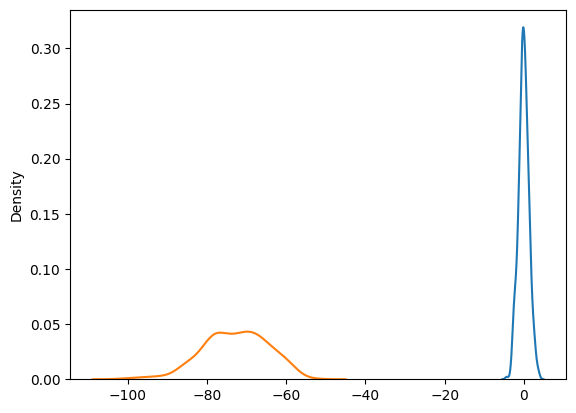

In [36]:
distance_from_same_population = [get_distance_sample()[0] for _ in range(500)]
distance_from_diff_population = [get_distance_sample()[1] for _ in range(500)]

sns.kdeplot(distance_from_same_population, label='same population')
sns.kdeplot(distance_from_diff_population, label='different population')